<a href="https://colab.research.google.com/github/Rahul21sai/ML_Mini_projects/blob/main/Car_price_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso

In [2]:
#data link =https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
data = pd.read_csv('/content/car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
data.shape

(301, 9)

In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#checking the distribution
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [16]:
 #encoding the data
data.replace({'Fuel_Type':{'Petrol' : 0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [17]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [49]:
x = data.drop(['Selling_Price',	'Car_Name'],axis = 1)
y = data['Selling_Price']

In [50]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [58]:
#train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=3,test_size=0.2)

In [59]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (240, 7) (61, 7)


In [71]:
#training the model
model = LinearRegression()

In [61]:
model.fit(x_train,y_train)

LinearRegression()

In [62]:
#predcition
t_predicit = model.predict(x_train)

In [63]:
# R square error
error_score = metrics.r2_score(y_train,t_predicit)

In [64]:
print("R squared error :",error_score)#accuracy score for classification regression r square error

R squared error : 0.8850493456998677


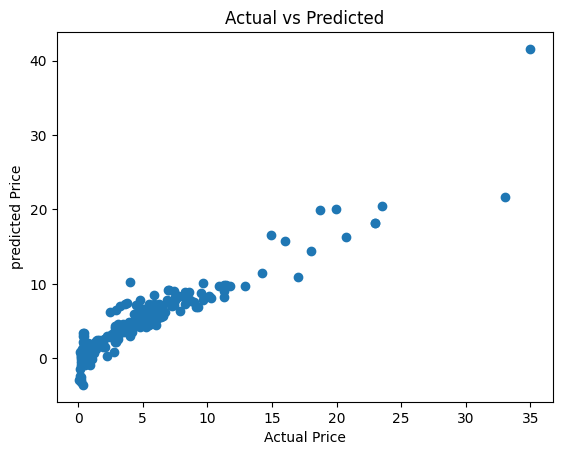

In [65]:
#visualize the acutal prize and predicted
plt.scatter(y_train,t_predicit)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [66]:
#predcition
test_predicit = model.predict(x_test)

In [68]:
# R square error
error_score = metrics.r2_score(y_test,test_predicit)
print(error_score)

0.8434910870906724


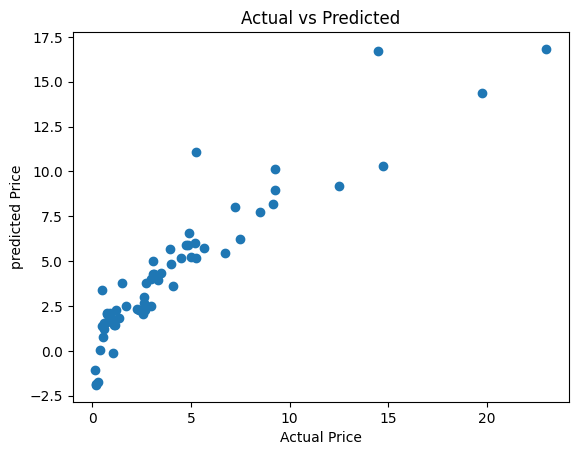

In [70]:
#visualize the acutal prize and predicted
plt.scatter(y_test,test_predicit)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual vs Predicted")
plt.show()

LASSO

In [72]:
#training the model
model = Lasso()

In [73]:
model.fit(x_train,y_train)

Lasso()

In [74]:
#predcition
t_predicit = model.predict(x_train)

In [75]:
# R square error
error_score = metrics.r2_score(y_train,t_predicit)

In [77]:
print("R squared error :",error_score)#accuracy score for classification regression r square error

R squared error : 0.8489270481716822


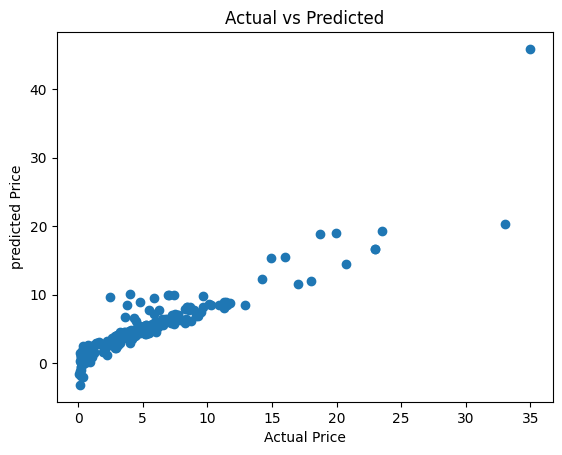

In [78]:
#visualize the acutal prize and predicted
plt.scatter(y_train,t_predicit)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [79]:
#predcition
test_predicit = model.predict(x_test)

In [80]:
# R square error
error_score = metrics.r2_score(y_test,test_predicit)
print(error_score)

0.8137283846309922


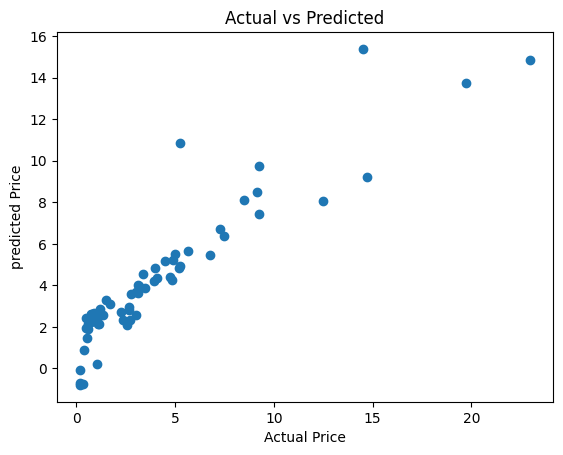

In [81]:
#visualize the acutal prize and predicted
plt.scatter(y_test,test_predicit)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual vs Predicted")
plt.show()